In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Datas/Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
round(100 * (data.isnull().sum()/len(data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
# Checking for Outliers

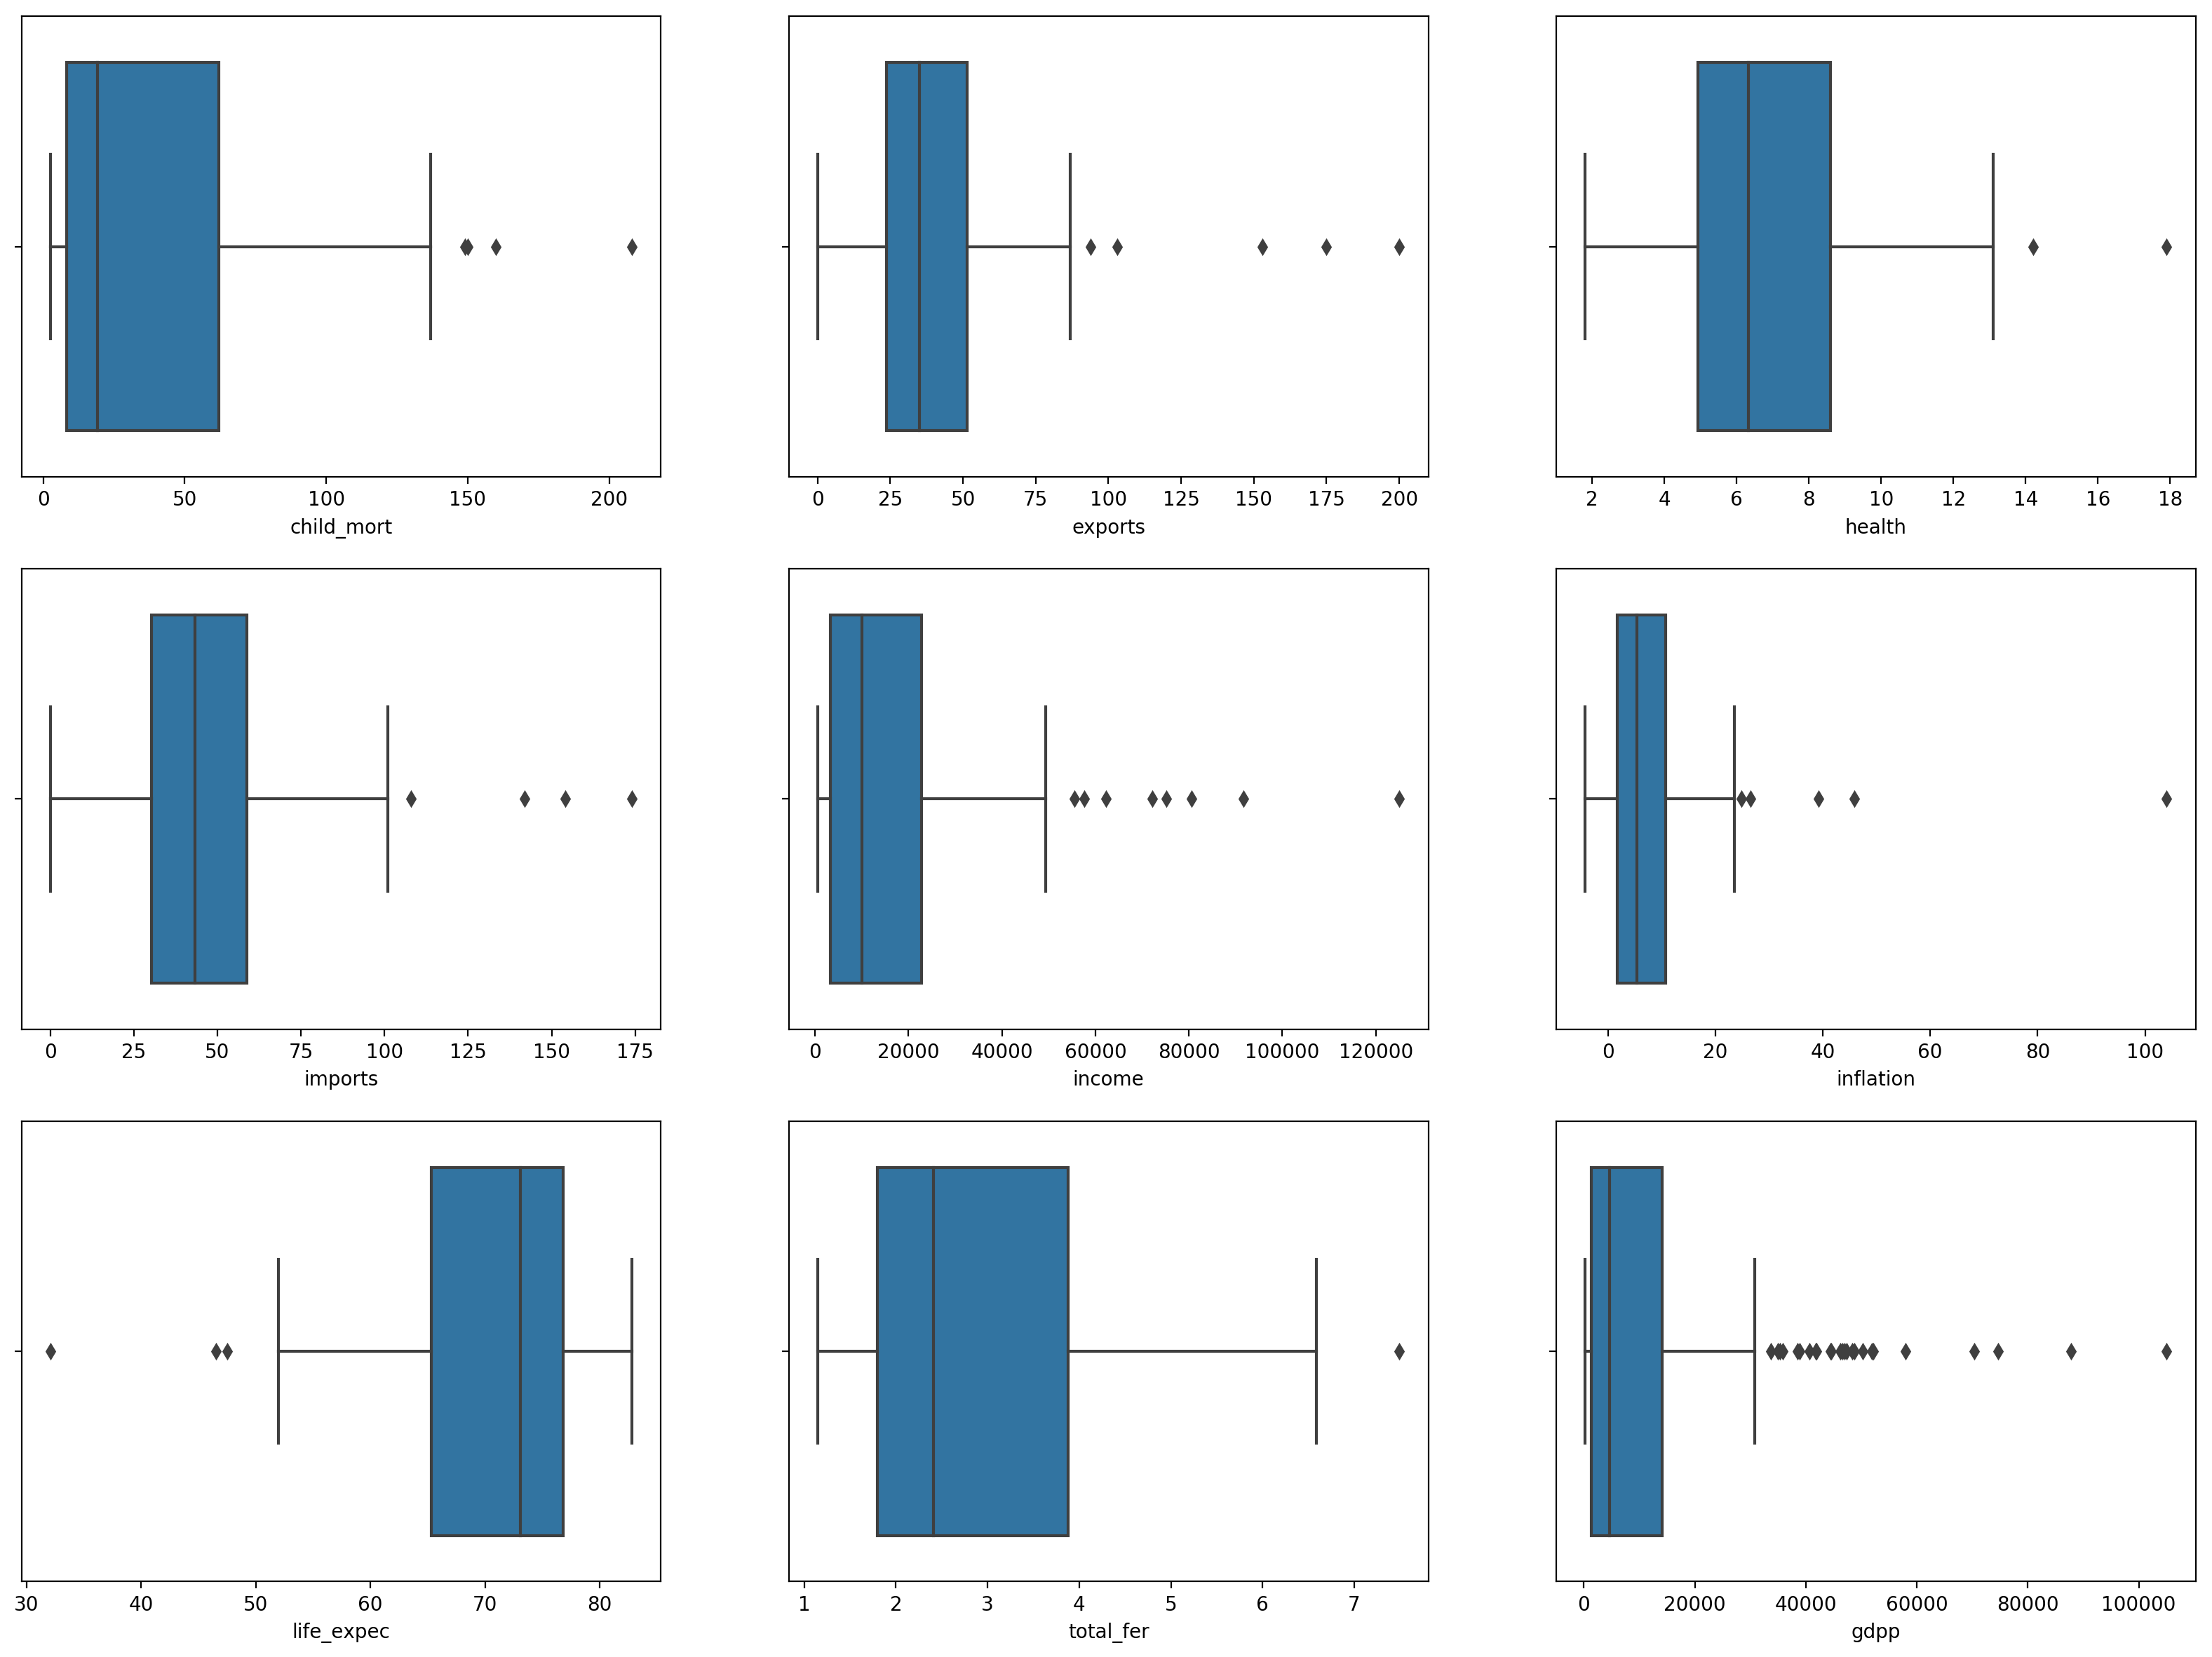

In [9]:
plt.figure(figsize = (20, 20), dpi = 200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = data)


In [10]:
# Checking for outliers using Z - score

In [11]:
from scipy import stats
z = np.abs(stats.zscore(data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************")
print("\n")


print("Below are outlier points with respective columns in the second array.")
print("\n")
print(np.where(z > 3))

[[1.29153238 1.13827979 0.27908825 ... 1.61909203 1.90288227 0.67917961]
 [0.5389489  0.47965843 0.09701618 ... 0.64786643 0.85997281 0.48562324]
 [0.27283273 0.09912164 0.96607302 ... 0.67042323 0.0384044  0.46537561]
 ...
 [0.37231541 1.13030491 0.0088773  ... 0.28695762 0.66120626 0.63775406]
 [0.44841668 0.40647827 0.59727159 ... 0.34463279 1.14094382 0.63775406]
 [1.11495062 0.15034774 0.33801514 ... 2.09278484 1.6246091  0.62954556]]


*******************


Below are outlier points with respective columns in the second array.


(array([ 23,  66,  66,  82,  91,  91,  91,  91,  98,  98, 112, 113, 114,
       123, 123, 132, 133, 133, 145, 159, 163], dtype=int64), array([4, 0, 6, 4, 1, 3, 4, 8, 1, 3, 7, 5, 8, 4, 8, 0, 1, 3, 8, 2, 5],
      dtype=int64))


In [12]:
# Removing the Outliers

In [13]:
data_outliers_removed = data[(z < 3).all(axis = 1)]

In [14]:
data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
print('Shape of dataframe before outlier removal: ' + str(data.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(data_outliers_removed.shape))

Shape of dataframe before outlier removal: (167, 10)


Shape of dataframe after outlier removal: (153, 10)


In [16]:
X = data_outliers_removed.drop('country', axis = 1)
y = data_outliers_removed['country']

In [17]:
X.shape

(153, 9)

In [18]:
y.shape

(153,)

In [19]:
# PCA

In [20]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [21]:
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5, :5]

array([[ 1.46183636, -1.41330427,  0.31809414, -0.04379952, -0.95456912],
       [-0.56911214, -0.52600184, -0.08875965,  0.15011384, -0.331921  ],
       [-0.27385196, -0.01333821, -1.02886841, -0.75132124, -0.10965359],
       [ 2.25655534,  1.16480224, -1.55027327, -0.14861755, -0.63351618],
       [-0.74295692,  0.3366533 , -0.29416156,  0.68992671,  0.354339  ]])

In [23]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [24]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

In [25]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


In [26]:
# Correlation matrix

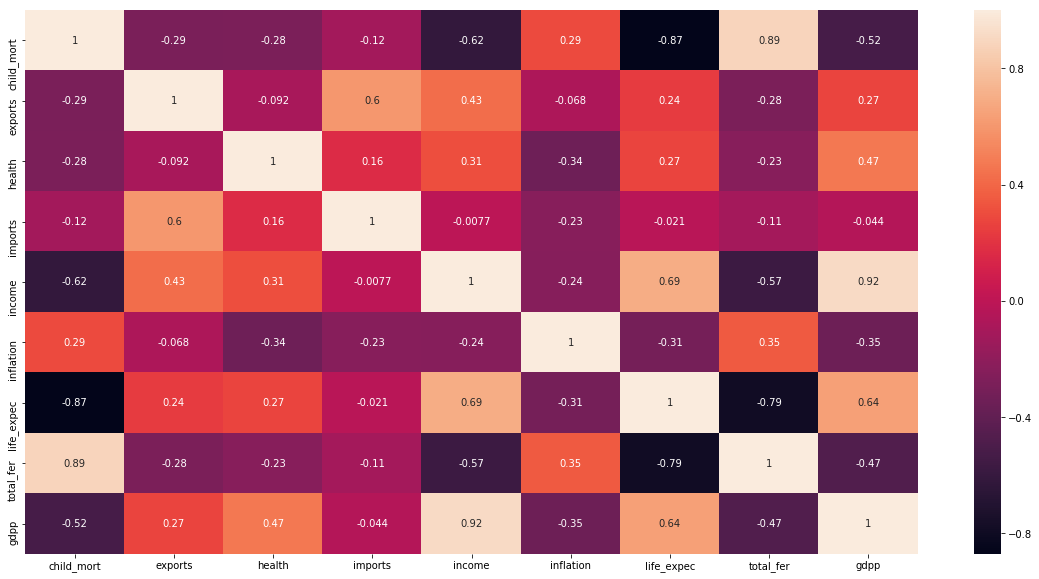

In [27]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_scaled_df.corr(), annot = True)

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(random_state = 42)

In [30]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pca.components_[0]

array([-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
       -0.22650995,  0.42715413, -0.40550525,  0.39482635])

In [32]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

In [33]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

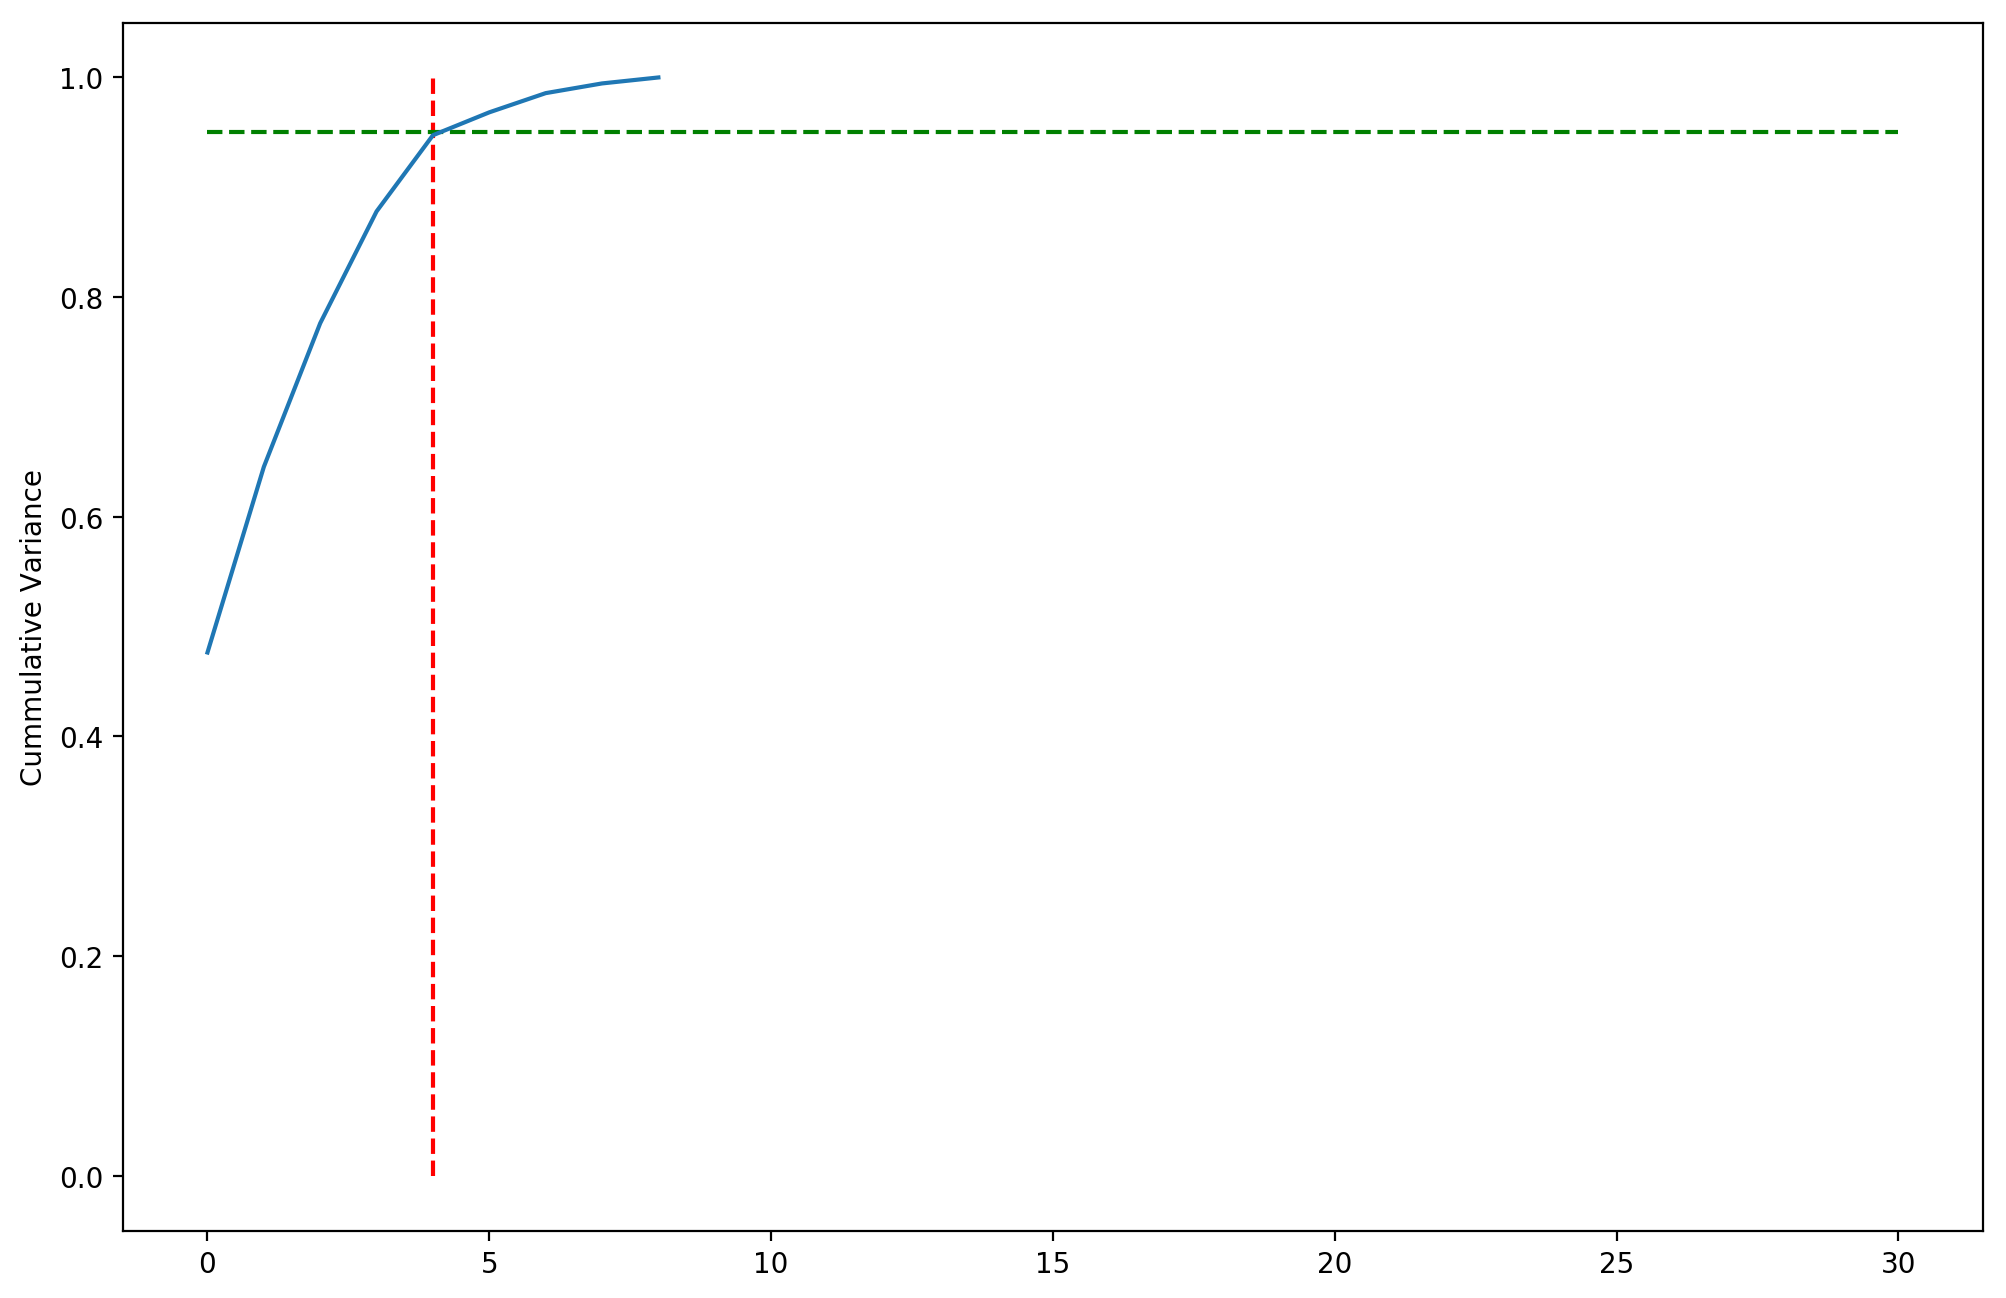

In [34]:
fig = plt.figure(figsize = [12, 8], dpi = 200)
plt.vlines(x = 4, ymax = 1, ymin = 0, colors = "r", linestyles = "--")
plt.hlines(y = 0.95, xmax = 30, xmin = 0, colors = "g", linestyles = "--")
plt.plot(var_cumu)
plt.ylabel("Cummulative Variance")
plt.show()

In [35]:
# Performing PCA with 4 components

In [36]:
from sklearn.decomposition import IncrementalPCA

In [37]:
pca_final = IncrementalPCA(n_components = 4)

In [38]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [39]:
print(X.shape)
print(X_pca_final.shape)

(153, 9)
(153, 4)


In [40]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [41]:
corrmat.shape

(4, 4)

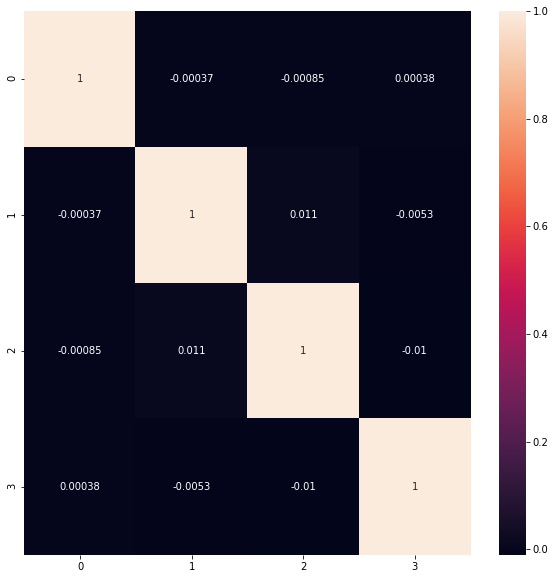

In [42]:
plt.figure(figsize = [10, 10])
sns.heatmap(corrmat, annot = True)

In [43]:
# Clustering

In [44]:
# K - Means Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [48]:
kmeans = KMeans(n_clusters = 5, max_iter = 1000)
kmeans.fit(X_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
kmeans.labels_

array([0, 1, 2, 0, 1, 2, 2, 4, 4, 2, 4, 3, 2, 1, 1, 3, 1, 0, 1, 2, 1, 1,
       2, 1, 0, 0, 1, 0, 4, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 3, 3, 4,
       2, 2, 2, 1, 0, 0, 3, 1, 4, 4, 2, 0, 1, 4, 0, 4, 1, 2, 0, 0, 1, 3,
       4, 2, 2, 2, 2, 3, 4, 4, 2, 4, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 3,
       1, 0, 0, 3, 3, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 4, 4, 3, 0, 3,
       1, 2, 2, 1, 4, 1, 2, 0, 1, 2, 0, 1, 3, 3, 3, 1, 0, 3, 4, 2, 1, 0,
       1, 4, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 3, 4, 2, 2, 1, 1, 2, 0])

In [50]:
# Finding the Optimal Number of Clusters

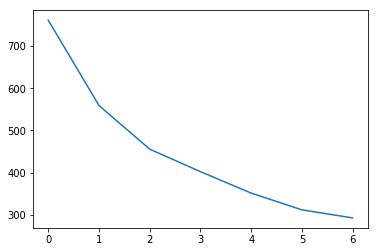

In [51]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [52]:
# Silhouette Analysis

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n clusters = {0}, silhouette score is {1}".format(num_clusters, silhouette_avg))

For n clusters = 2, silhouette score is 0.3185783255391955
For n clusters = 3, silhouette score is 0.3214159977534033
For n clusters = 4, silhouette score is 0.3069208111507679
For n clusters = 5, silhouette score is 0.2990239185411057
For n clusters = 6, silhouette score is 0.28239559625100835
For n clusters = 7, silhouette score is 0.29020444549845065
For n clusters = 8, silhouette score is 0.2739973551806063


In [54]:
kmeans = KMeans(n_clusters = 4, max_iter = 1000, random_state = 42)
kmeans.fit(X_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [55]:
kmeans.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3,
       3, 0, 0, 3, 2, 3, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1,
       3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 1])

In [56]:
data_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


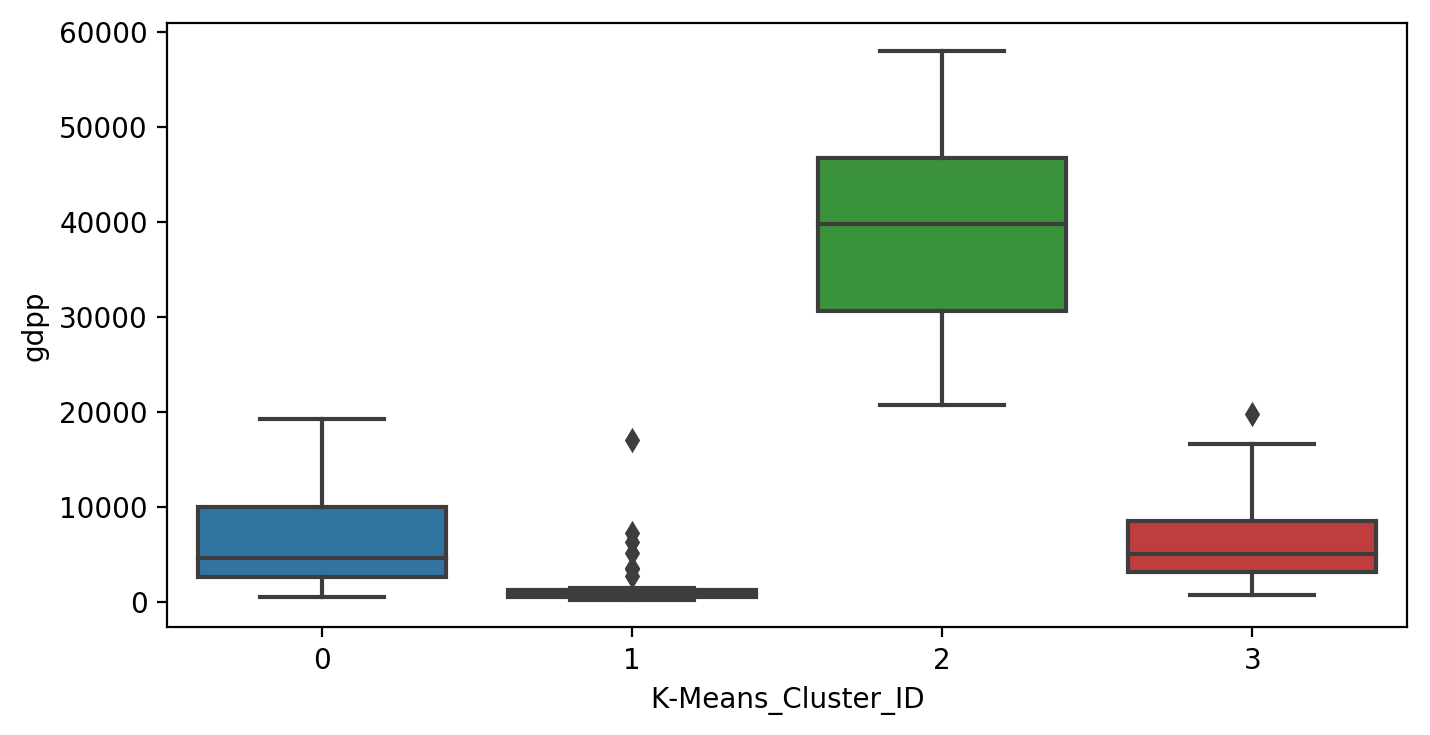

In [58]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(x = 'K-Means_Cluster_ID', y = 'gdpp', data = data_outliers_removed)

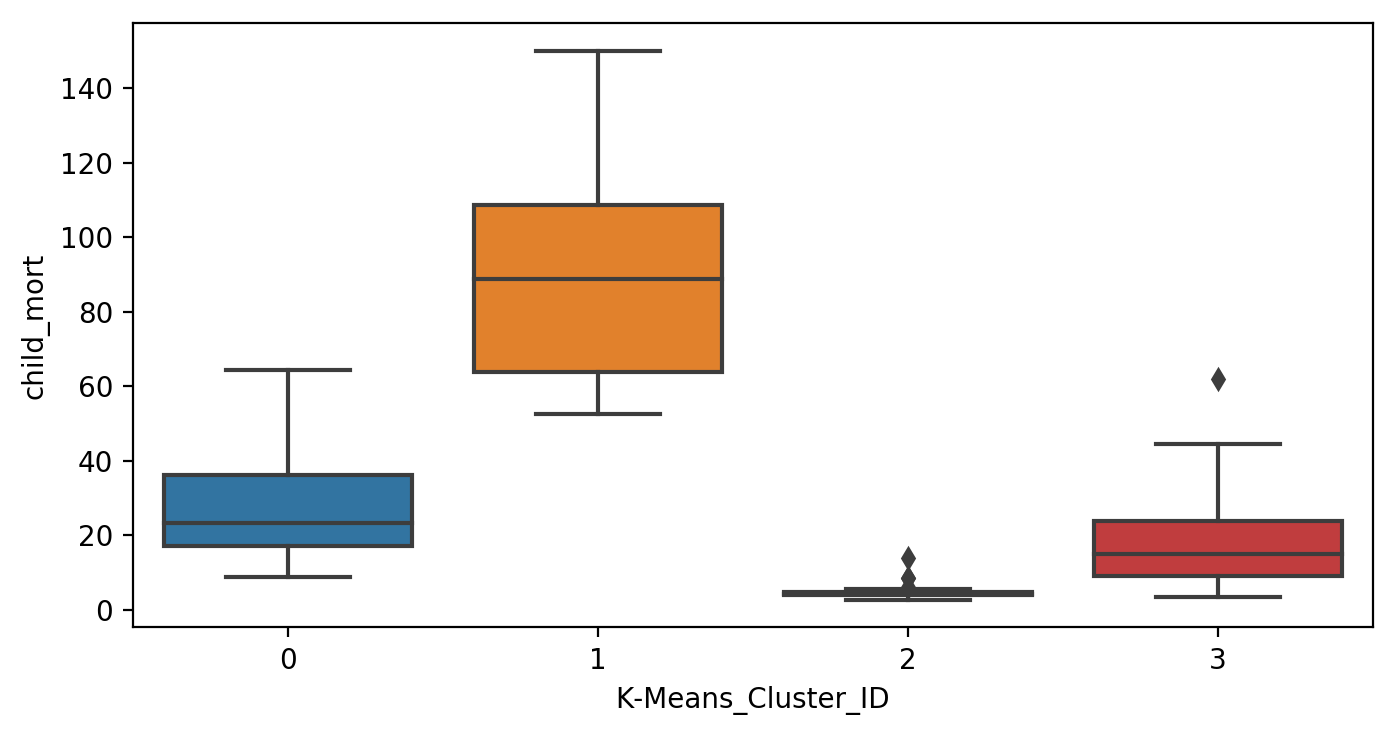

In [59]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(x = 'K-Means_Cluster_ID', y = 'child_mort', data = data_outliers_removed)

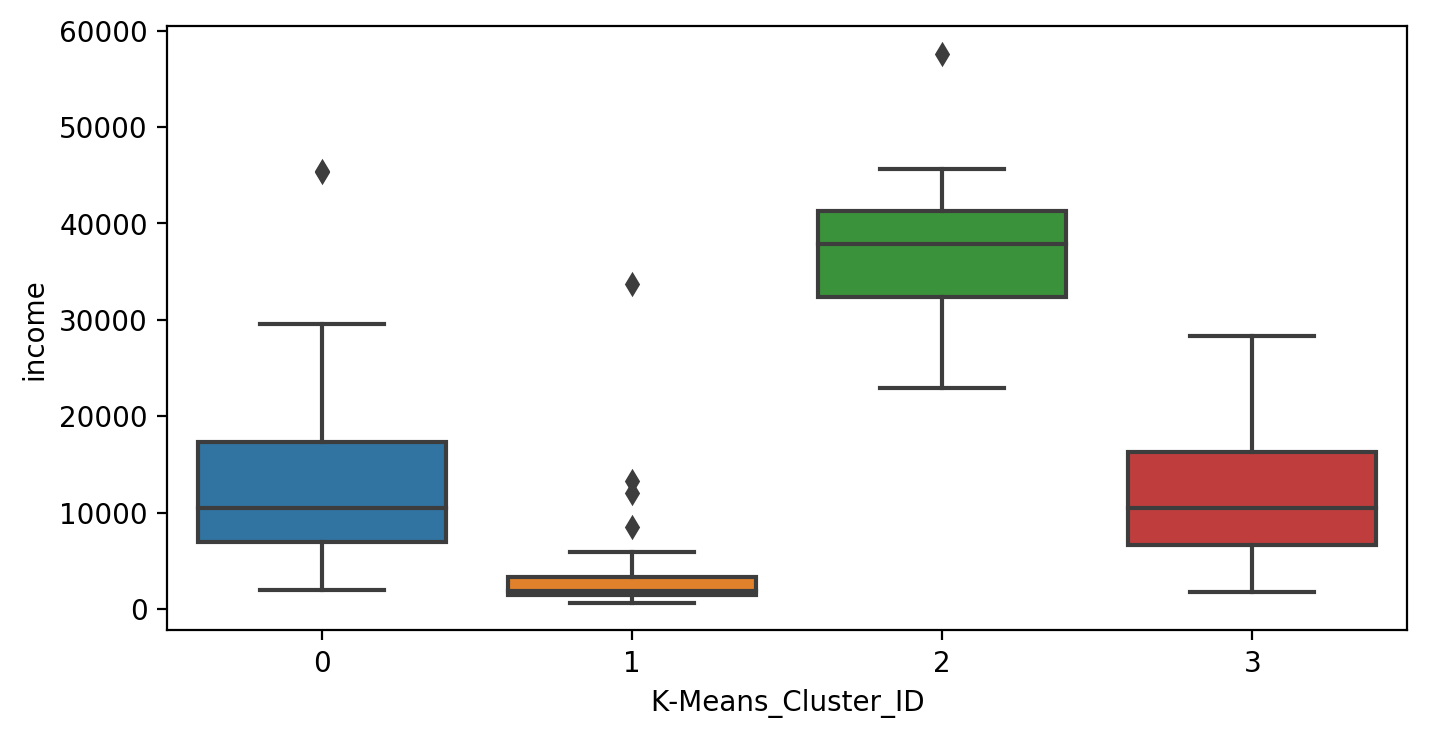

In [60]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(x='K-Means_Cluster_ID', y = 'income', data = data_outliers_removed)

In [61]:
# Hierarchical Clustering

In [62]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


In [63]:
# Single Linkage

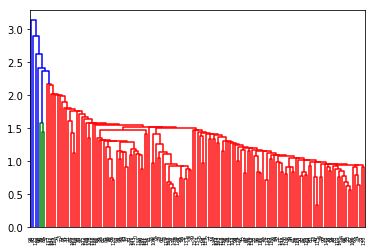

In [64]:
s1_mergings = linkage(X_scaled_df, method = "single", metric = "euclidean")
dendrogram(s1_mergings)
plt.show()

In [65]:
# Complete Linkage

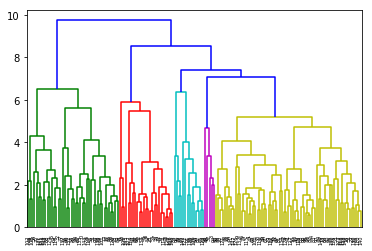

In [66]:
c1_mergings = linkage(X_scaled_df, method = "complete", metric = 'euclidean')
dendrogram(c1_mergings)
plt.show()

In [67]:
# 4 clusters using simple linkage
s1_cluster_labels = cut_tree(s1_mergings, n_clusters = 4).reshape(-1, )
s1_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
# 4 clusters using complete linkage
c1_cluster_labels = cut_tree(c1_mergings, n_clusters = 4).reshape(-1, )
c1_cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 3,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3,
       1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0])

In [69]:
data_outliers_removed["Hierarchical_Cluster_labels"] = c1_cluster_labels

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


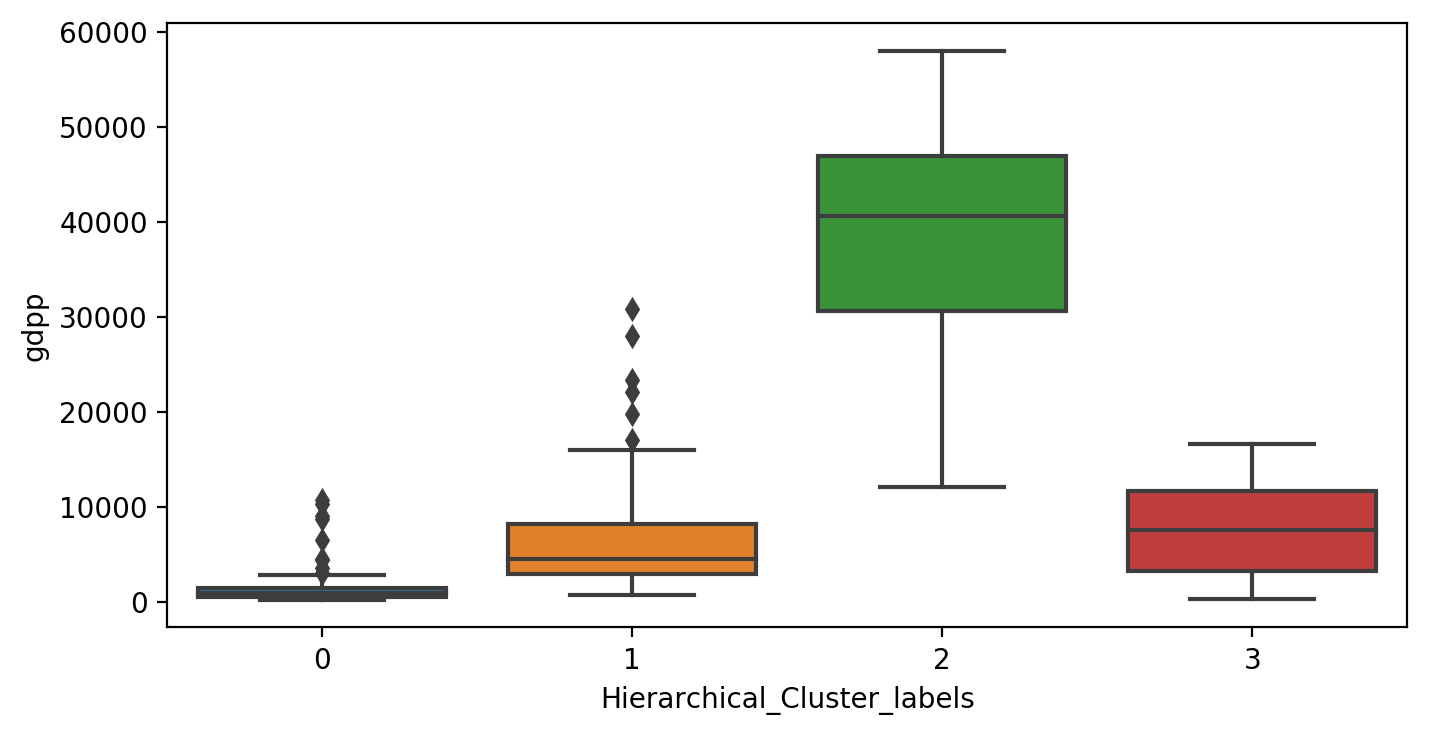

In [71]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(x = 'Hierarchical_Cluster_labels', y = 'gdpp', data = data_outliers_removed)

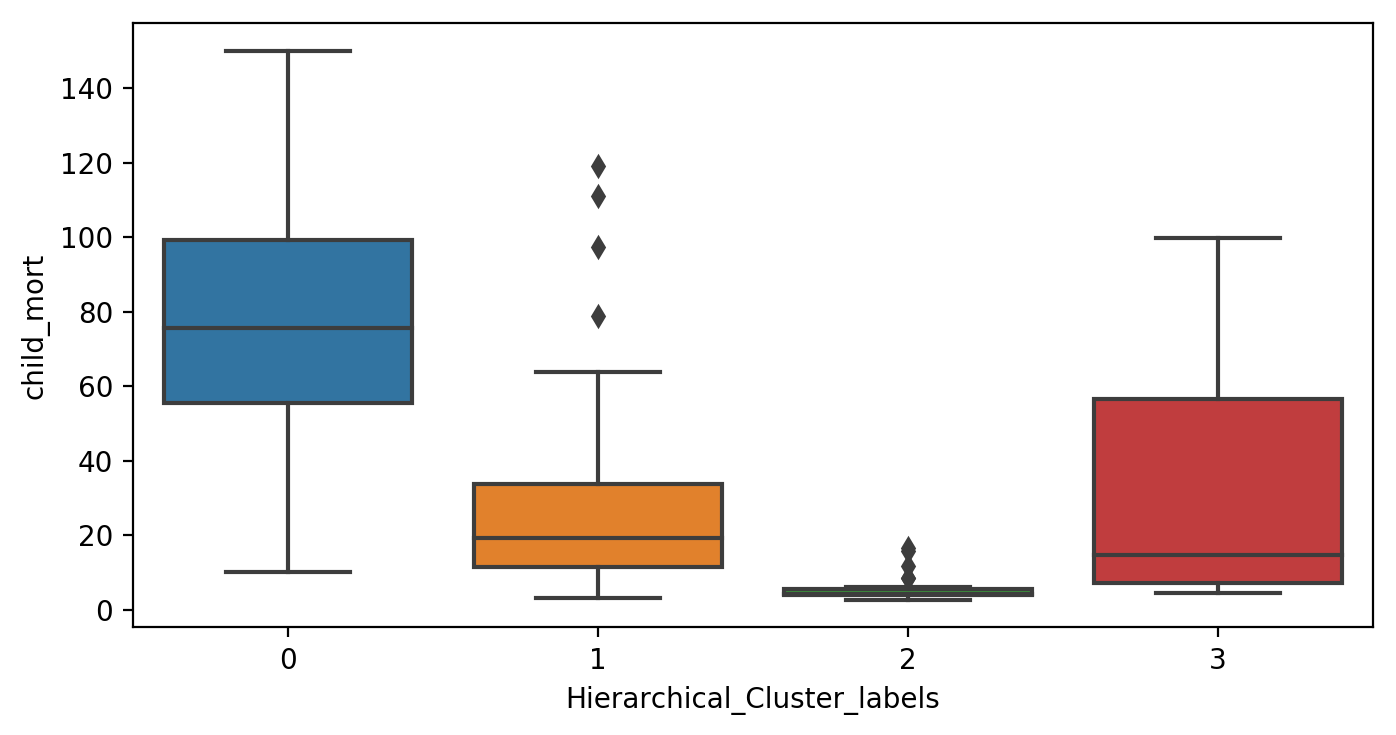

In [72]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(x = 'Hierarchical_Cluster_labels', y = 'child_mort', data = data_outliers_removed)

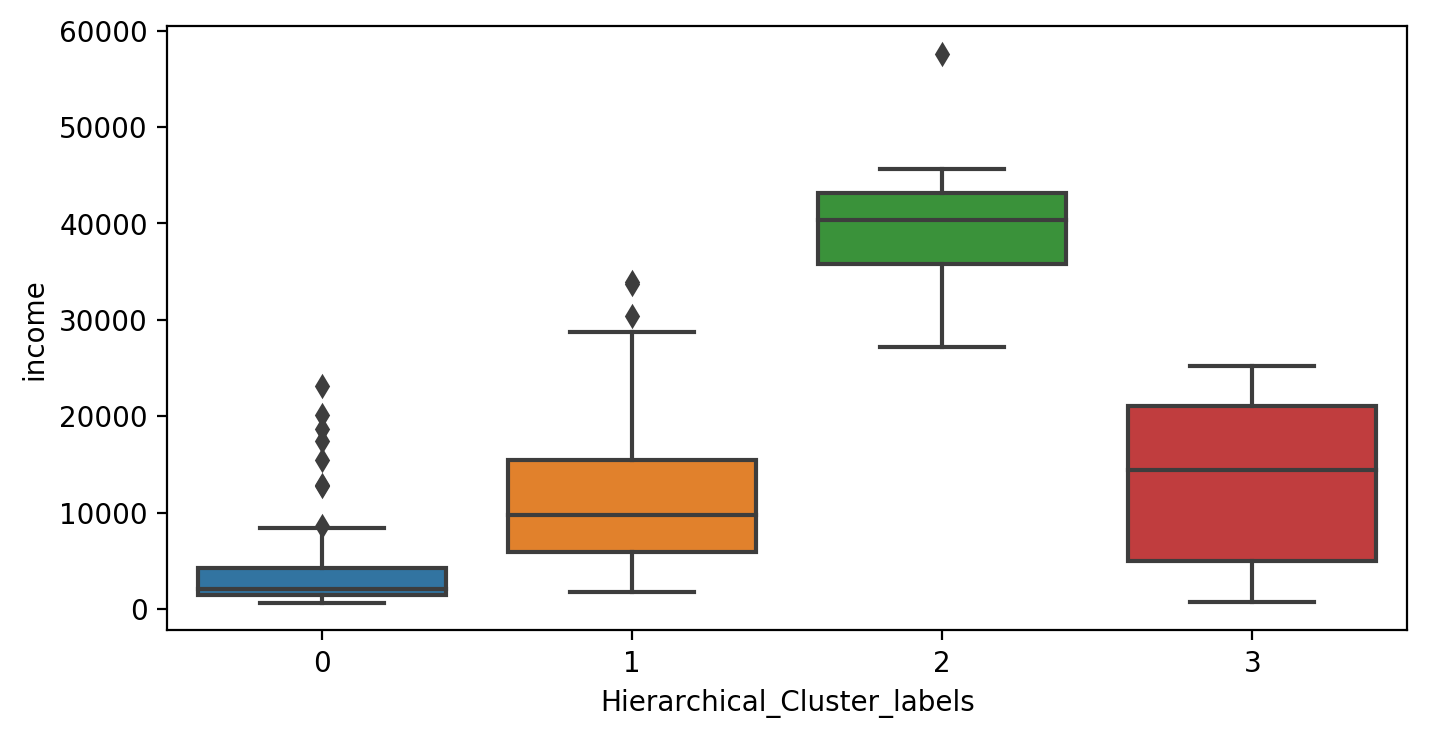

In [73]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.boxplot(x = 'Hierarchical_Cluster_labels', y = 'income', data = data_outliers_removed)

In [74]:
data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


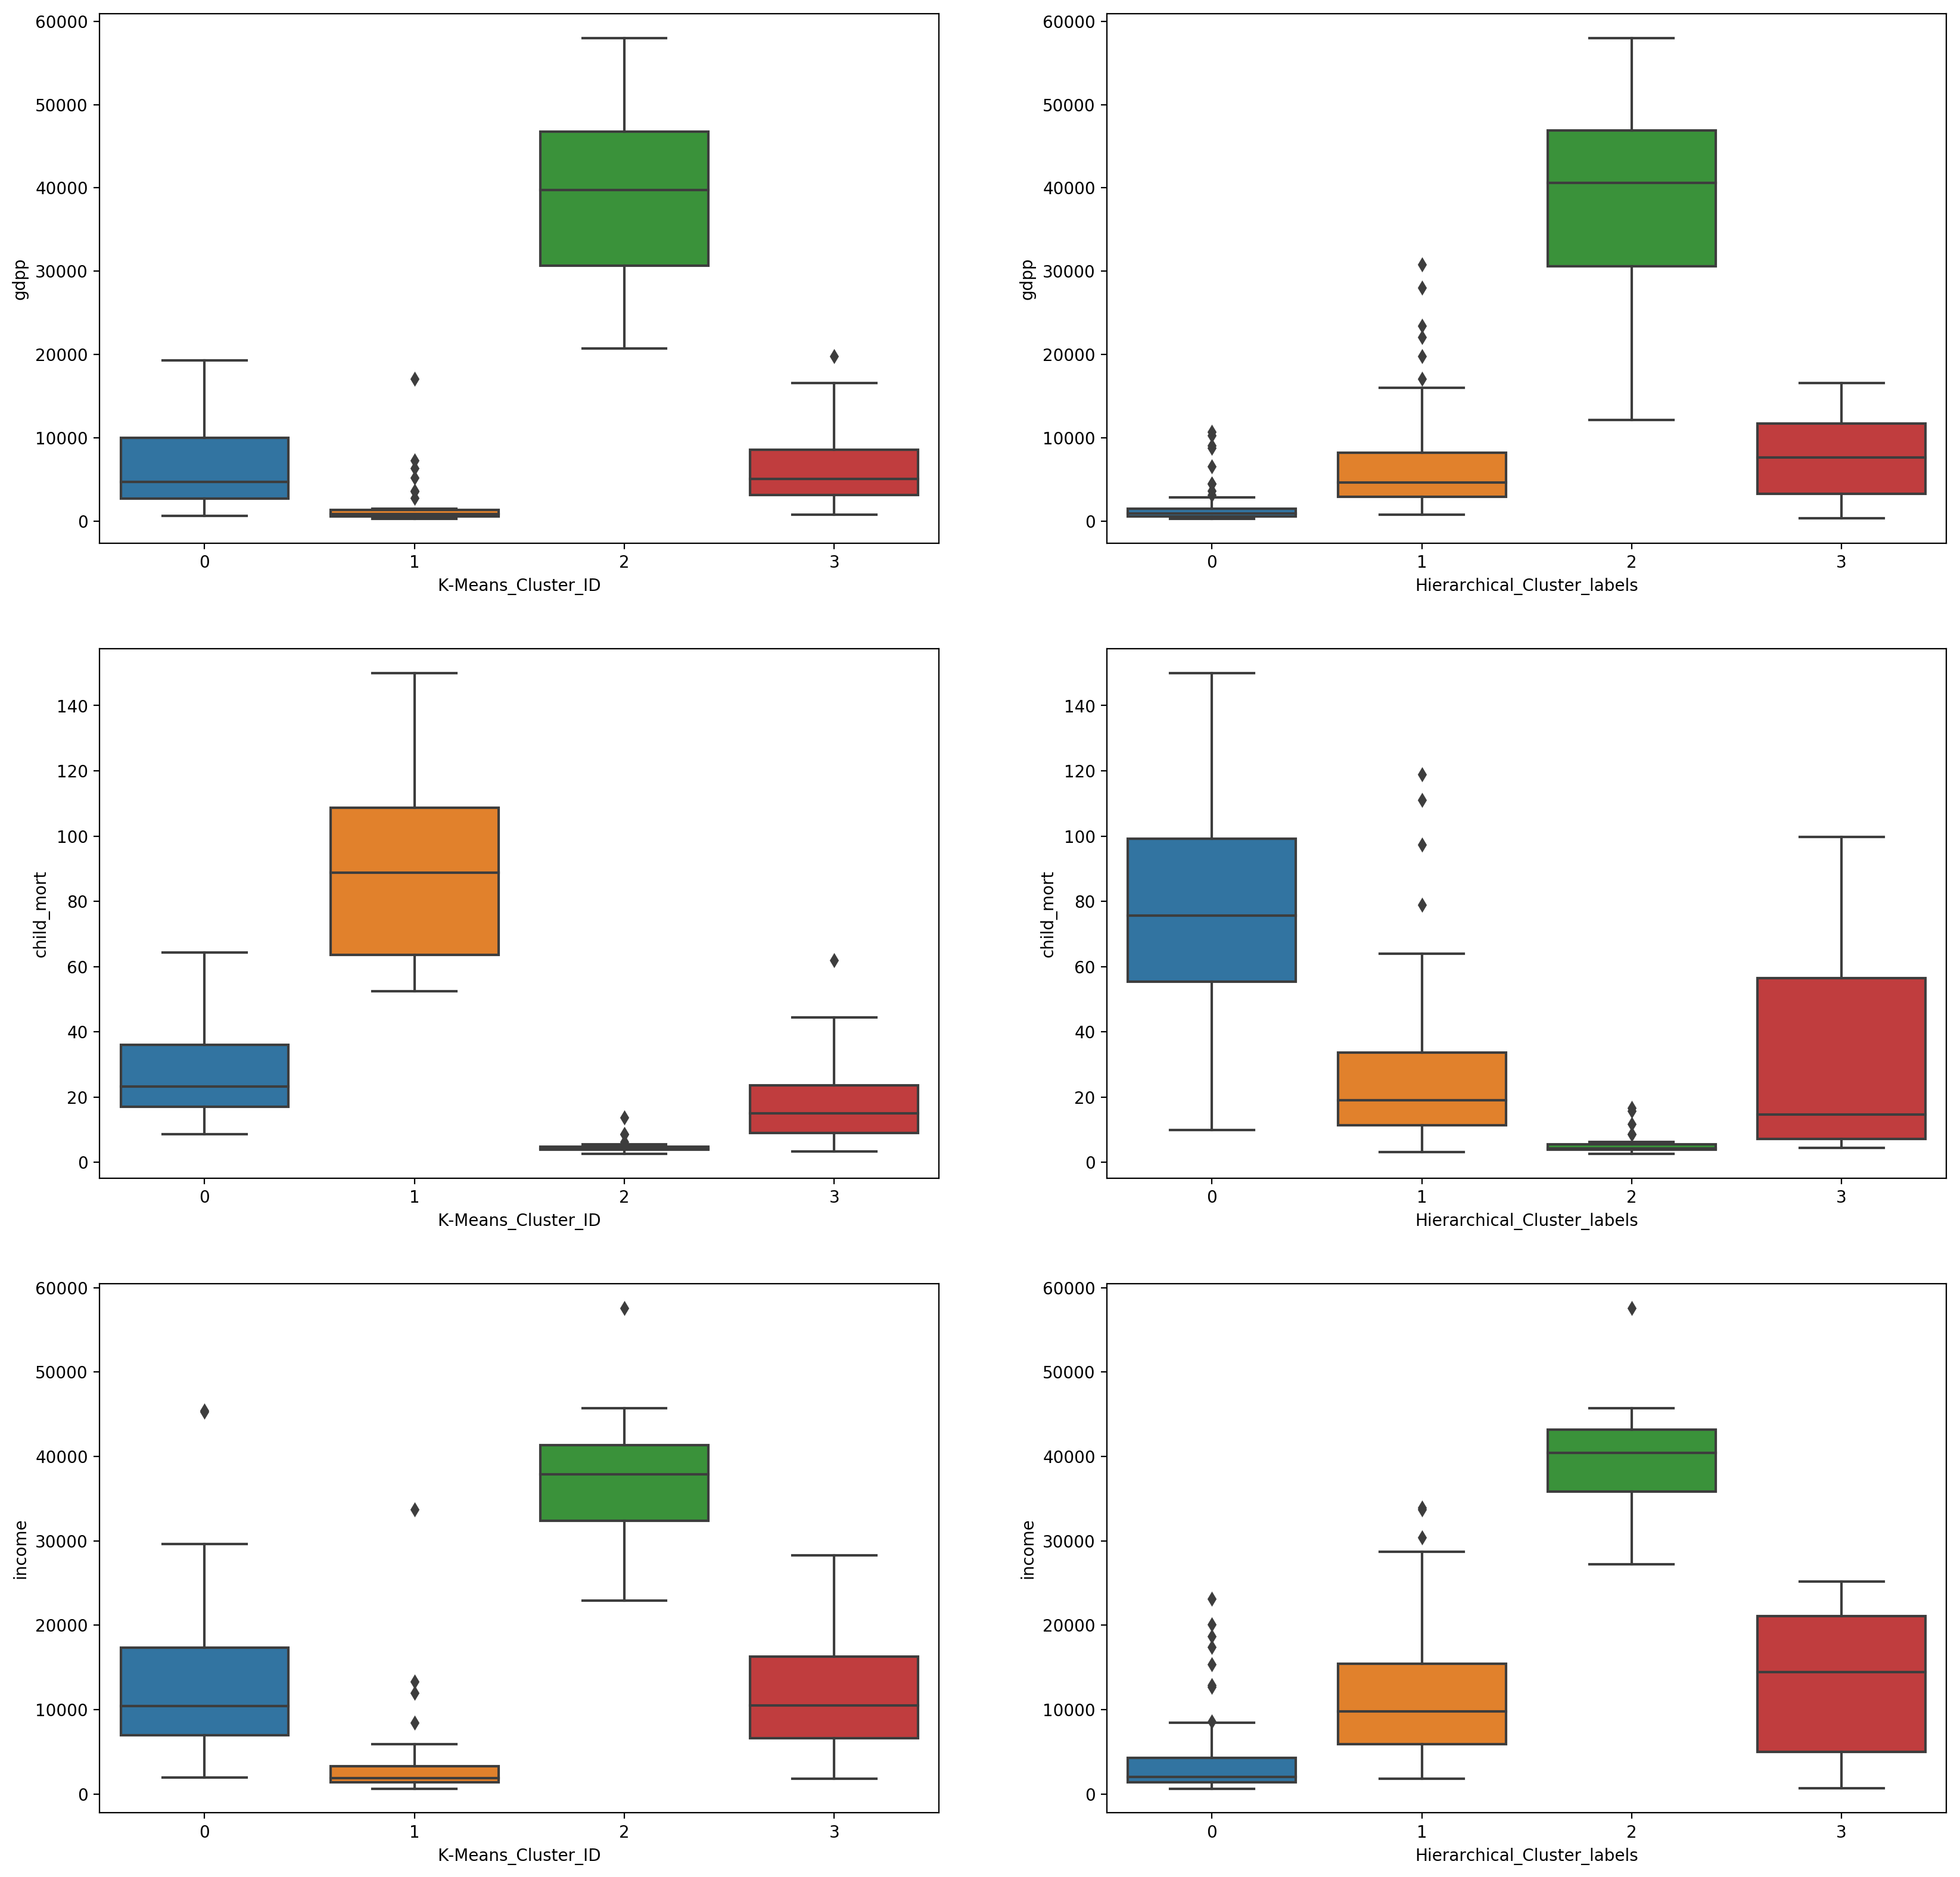

In [75]:
plt.figure(figsize = (20, 20), dpi = 200)

plt.subplot(3, 2, 1)
sns.boxplot(x = 'K-Means_Cluster_ID', y = 'gdpp', data = data_outliers_removed)

plt.subplot(3, 2, 2)
sns.boxplot(x = 'Hierarchical_Cluster_labels', y = 'gdpp', data = data_outliers_removed)

plt.subplot(3, 2, 3)
sns.boxplot(x = 'K-Means_Cluster_ID', y = 'child_mort', data = data_outliers_removed)

plt.subplot(3, 2, 4)
sns.boxplot(x = 'Hierarchical_Cluster_labels', y = 'child_mort', data = data_outliers_removed)

plt.subplot(3, 2, 5)
sns.boxplot(x = 'K-Means_Cluster_ID', y = 'income', data = data_outliers_removed)

plt.subplot(3, 2, 6)
sns.boxplot(x = 'Hierarchical_Cluster_labels', y = 'income', data = data_outliers_removed)


In [76]:
X_pca_final_df = pd.DataFrame(X_pca_final, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [77]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,-3.129112,-0.530438,1.326366,0.592673
1,0.552498,-0.242770,-0.157737,-1.362826
2,-0.357008,-0.461483,-1.876976,-0.109599
3,-3.456355,1.213750,-1.381585,2.217845
4,1.308078,0.615244,-0.031004,-0.713291


In [78]:
X_pca_final_df['K-Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = c1_cluster_labels

In [79]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,K-Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-3.129112,-0.530438,1.326366,0.592673,1,0
1,0.552498,-0.242770,-0.157737,-1.362826,3,1
2,-0.357008,-0.461483,-1.876976,-0.109599,0,0
3,-3.456355,1.213750,-1.381585,2.217845,1,1
4,1.308078,0.615244,-0.031004,-0.713291,3,1


In [80]:
# Scatter plot using two principal components to observe the cluster distribution

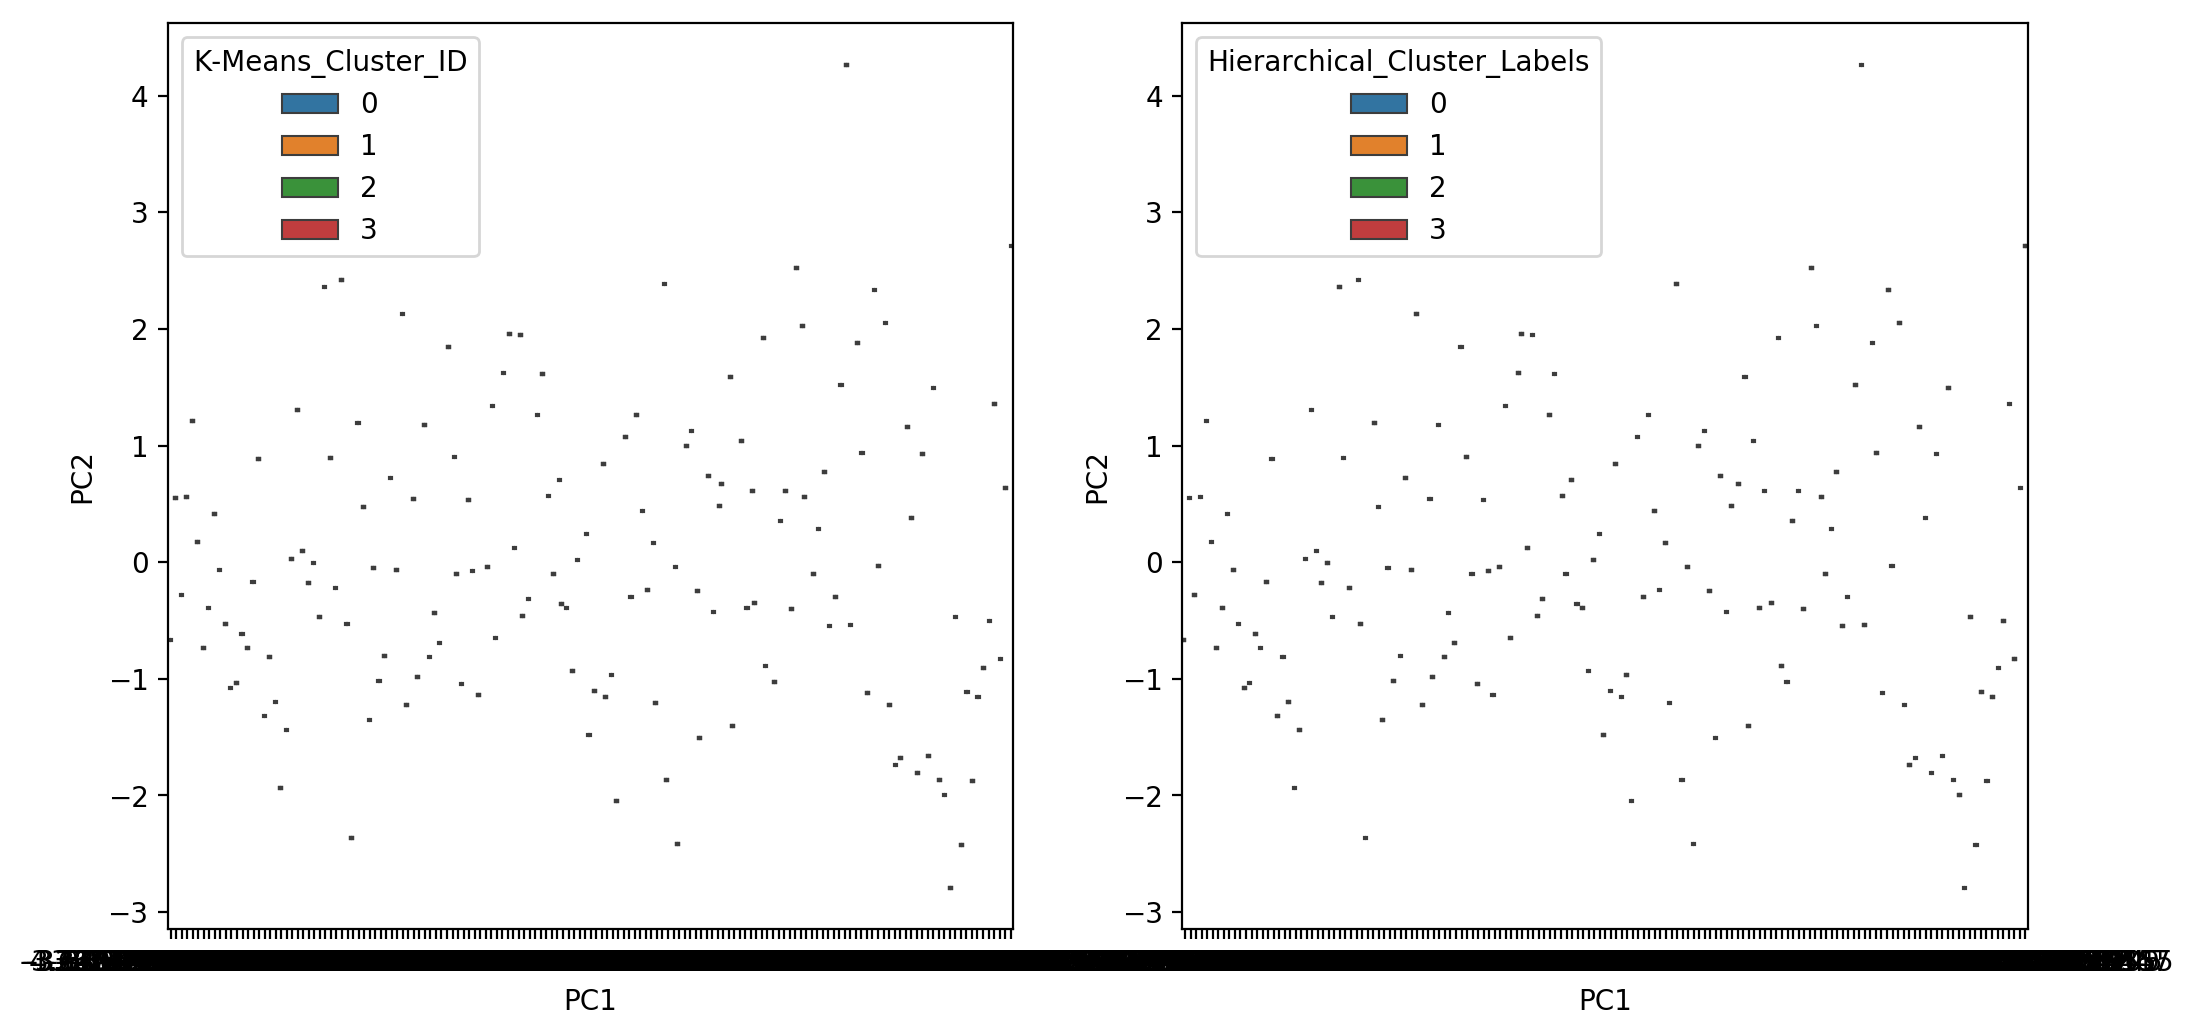

In [82]:
plt.figure(figsize = (12, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.boxplot(x ='PC1', y ='PC2', data = X_pca_final_df, hue = "K-Means_Cluster_ID")

plt.subplot(1, 2, 2)
sns.boxplot(x ='PC1', y ='PC2', data = X_pca_final_df, hue = "Hierarchical_Cluster_Labels")

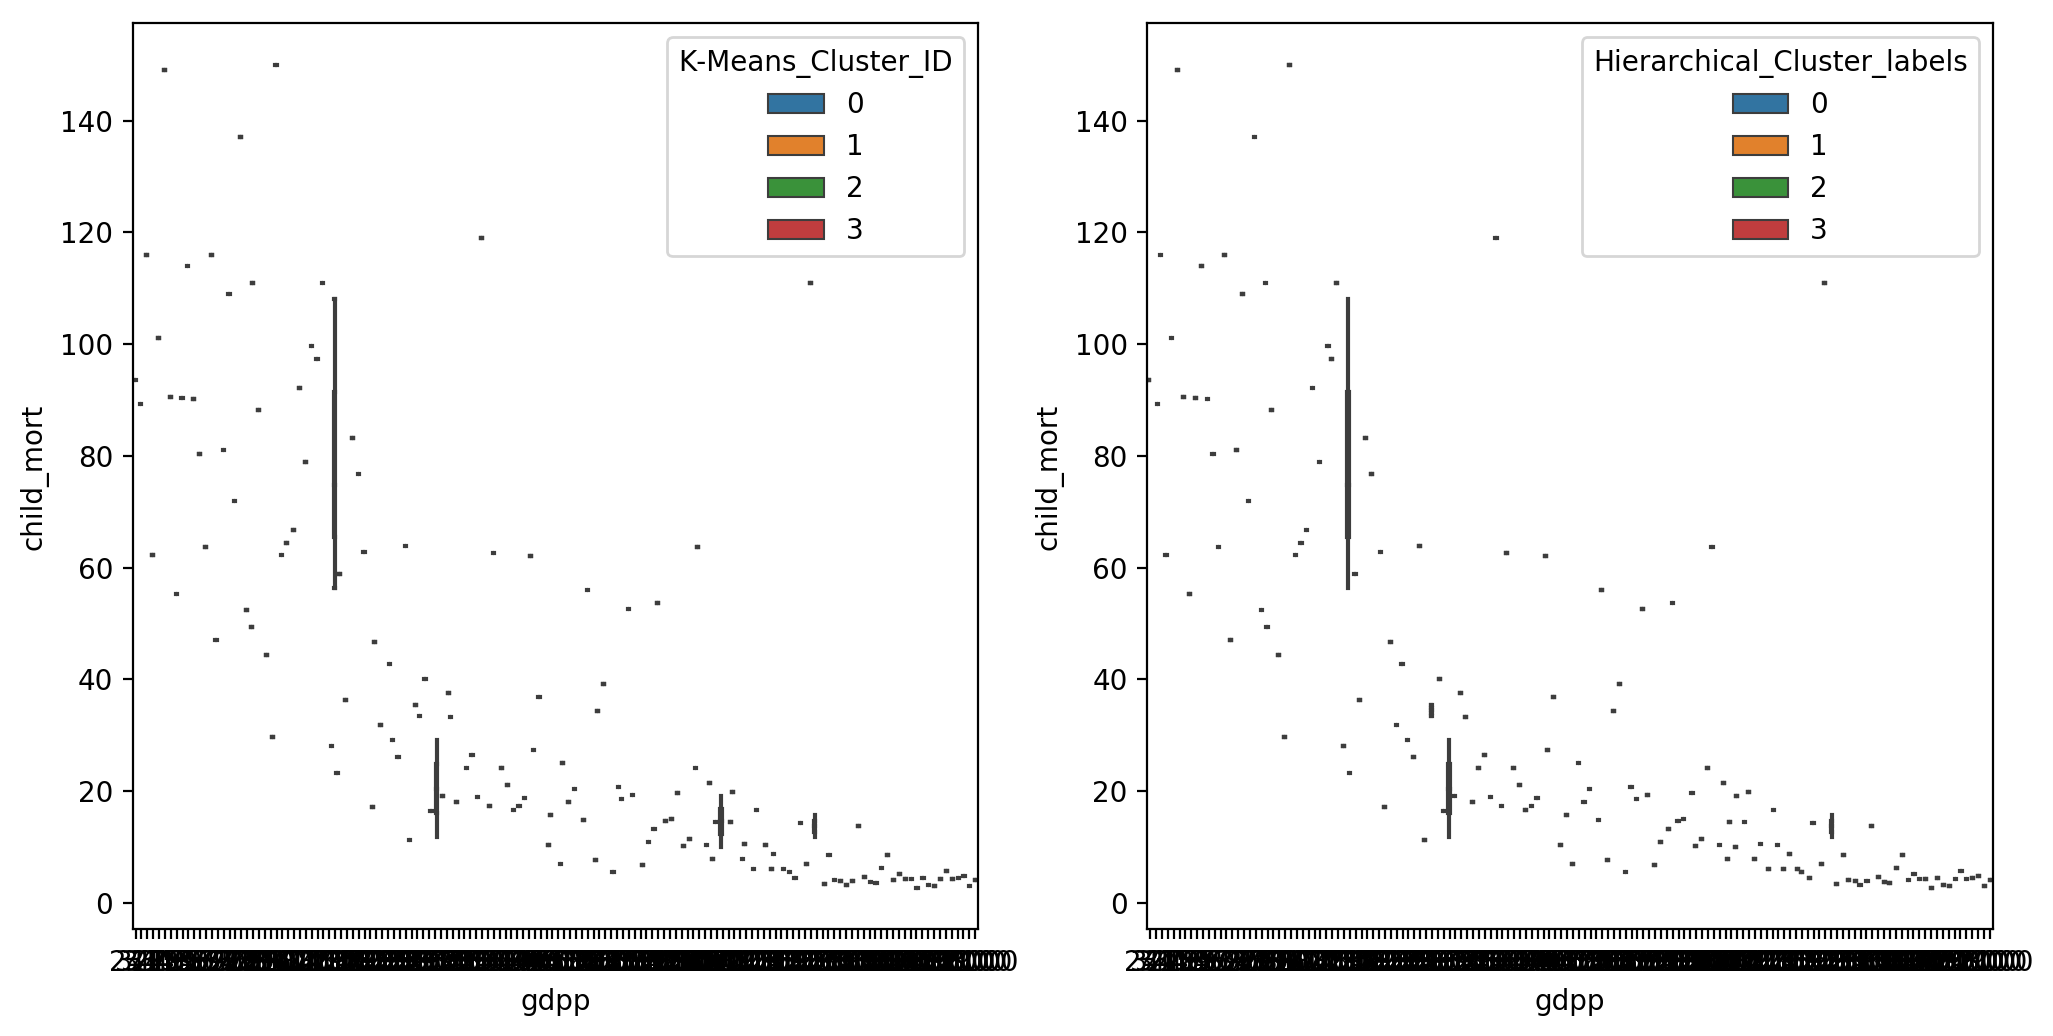

In [85]:
plt.figure(figsize = (12, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'gdpp', y = 'child_mort', data = data_outliers_removed, hue = 'K-Means_Cluster_ID')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'gdpp', y = 'child_mort', data = data_outliers_removed, hue = 'Hierarchical_Cluster_labels')

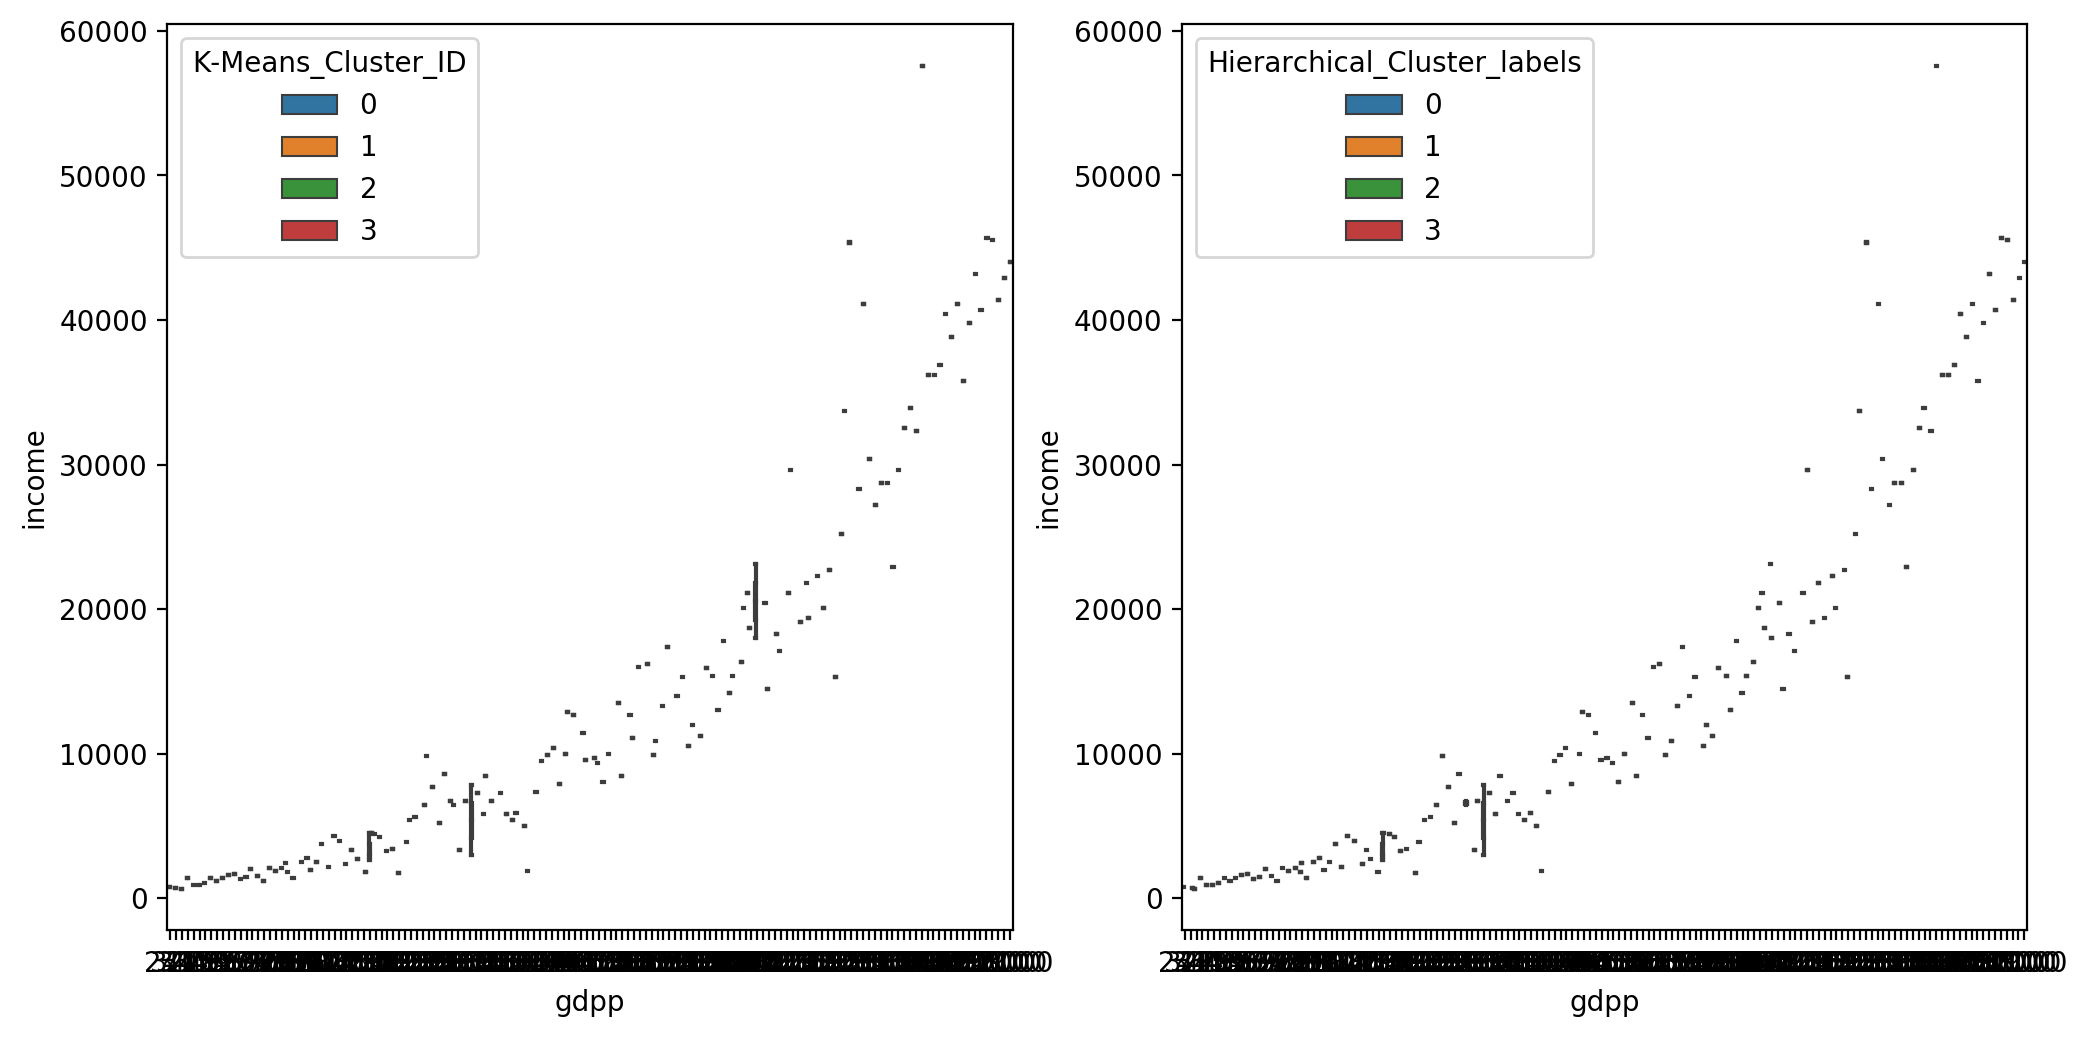

In [87]:
plt.figure(figsize = (12, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'gdpp', y = 'income', data = data_outliers_removed, hue = "K-Means_Cluster_ID")

plt.subplot(1, 2, 2)
sns.boxplot(x = 'gdpp', y = 'income', data = data_outliers_removed, hue = "Hierarchical_Cluster_labels")

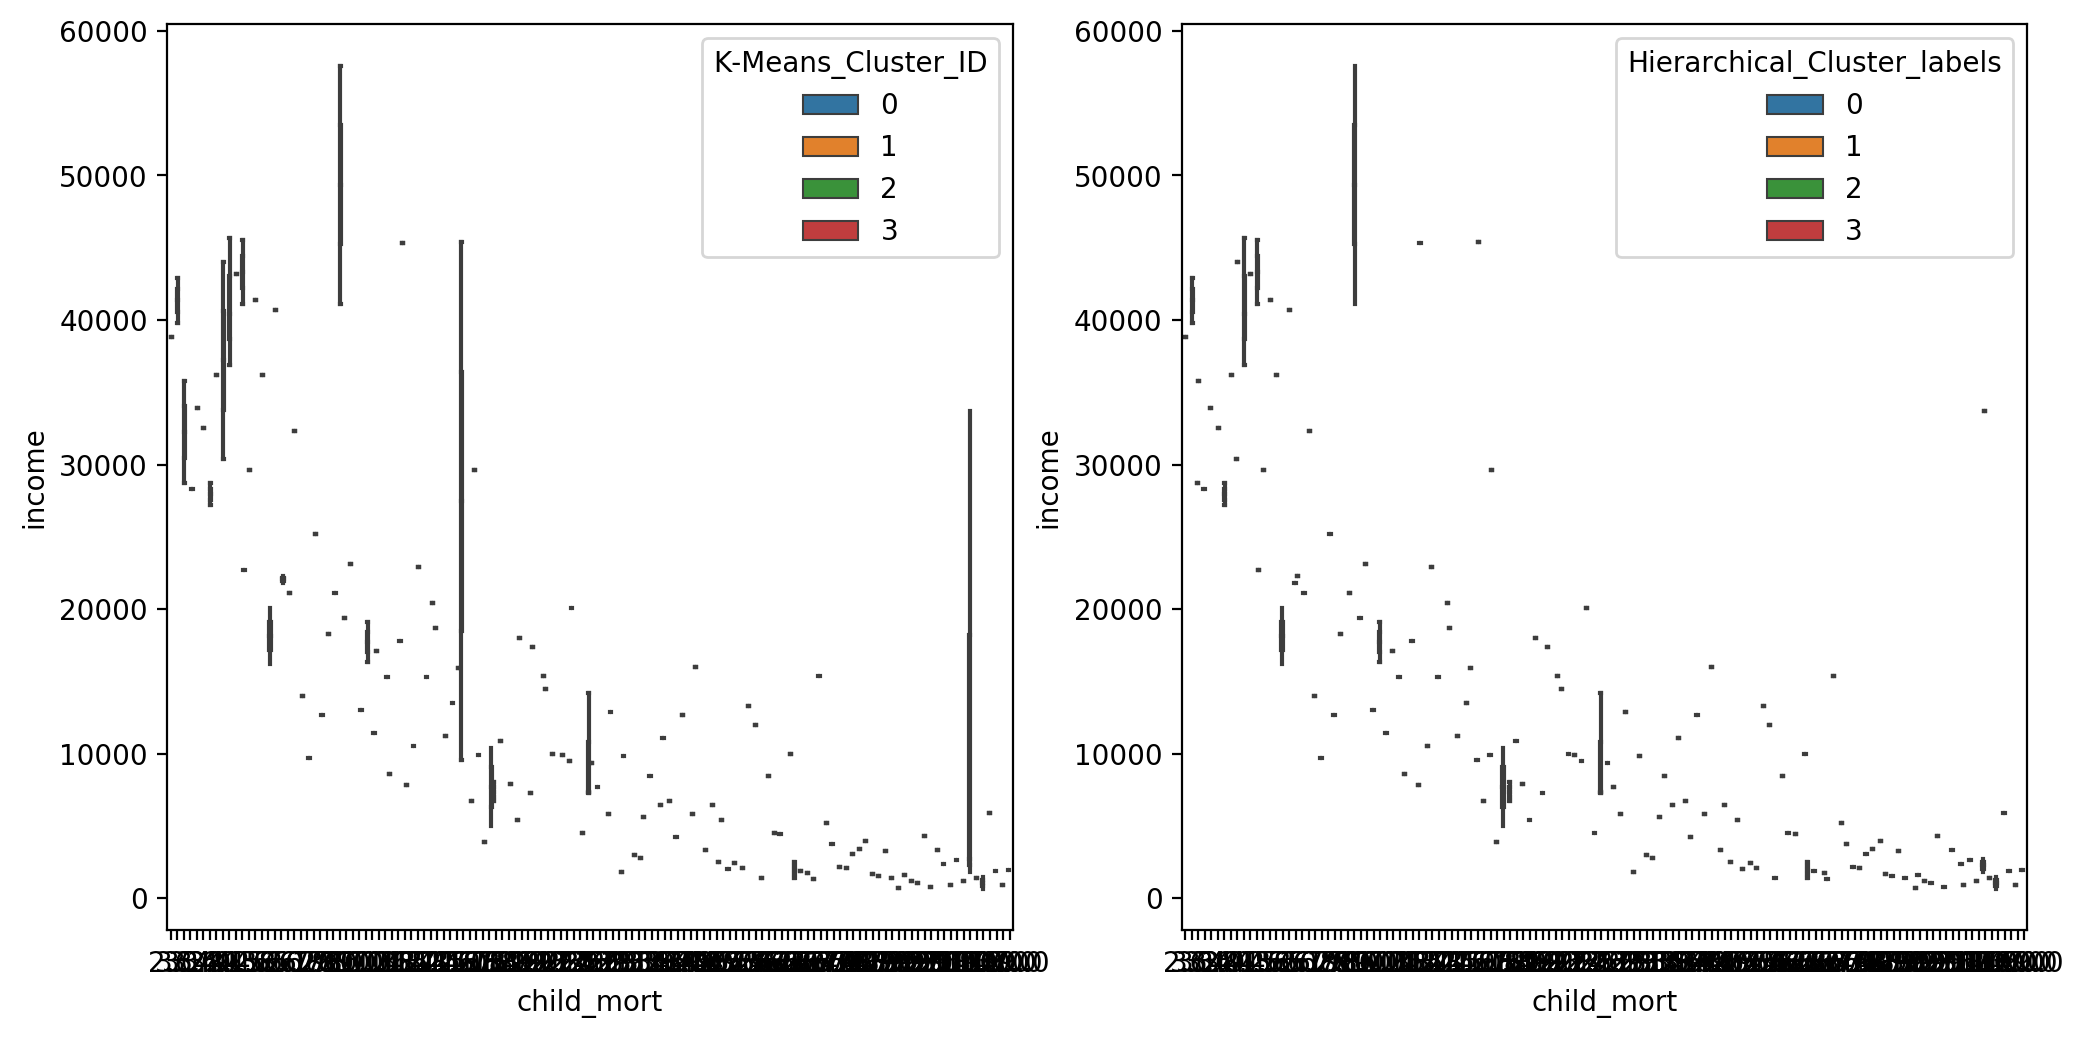

In [88]:
plt.figure(figsize = (12, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'child_mort', y = 'income', data = data_outliers_removed, hue = 'K-Means_Cluster_ID')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'child_mort', y = 'income', data = data_outliers_removed, hue = 'Hierarchical_Cluster_labels')

In [89]:
# From K-Means clustering

In [90]:
K_Means_countries = data_outliers_removed[data_outliers_removed['K-Means_Cluster_ID'] == 1]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,0


In [91]:
# From Hierarchical Clustering

In [92]:
Hierarchical_Countries = data_outliers_removed[data_outliers_removed['Hierarchical_Cluster_labels'] == 0]
Hierarchical_Countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,0
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,0,0
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1,0
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1,0


In [94]:
len(K_Means_countries)

42

In [95]:
len(Hierarchical_Countries)

42

In [96]:
common_countries = pd.merge(K_Means_countries, Hierarchical_Countries, how = 'inner', on = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'K-Means_Cluster_ID', 'Hierarchical_Cluster_labels'])

In [97]:
common_countries.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'],
      dtype='object')

In [98]:
common_countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
0,Afghanistan,90.2,553,1610
1,Benin,111.0,758,1820
2,Burkina Faso,116.0,575,1430
3,Burundi,93.6,231,764
4,Cameroon,108.0,1310,2660
5,Central African Republic,149.0,446,888
6,Chad,150.0,897,1930
7,Comoros,88.2,769,1410
8,"Congo, Dem. Rep.",116.0,334,609
9,Cote d'Ivoire,111.0,1220,2690


In [99]:
len(common_countries)

30

In [100]:
common_countries_final = common_countries[['country', 'child_mort', 'gdpp', 'income']].sort_values(['child_mort', 'income'], ascending = [False, True])
common_countries_final

,country,child_mort,gdpp,income
6,Chad,150.0,897,1930
5,Central African Republic,149.0,446,888
18,Mali,137.0,708,1870
8,"Congo, Dem. Rep.",116.0,334,609
2,Burkina Faso,116.0,575,1430
14,Guinea-Bissau,114.0,547,1390
1,Benin,111.0,758,1820
9,Cote d'Ivoire,111.0,1220,2690
13,Guinea,109.0,648,1190
4,Cameroon,108.0,1310,2660


In [101]:
final_countries = common_countries_final[(common_countries_final['child_mort'] > 80 ) & (common_countries_final['child_mort'] < 1200)]
final_countries = final_countries.reset_index(drop = True)
final_countries

,country,child_mort,gdpp,income
0,Chad,150.0,897,1930
1,Central African Republic,149.0,446,888
2,Mali,137.0,708,1870
3,"Congo, Dem. Rep.",116.0,334,609
4,Burkina Faso,116.0,575,1430
5,Guinea-Bissau,114.0,547,1390
6,Benin,111.0,758,1820
7,Cote d'Ivoire,111.0,1220,2690
8,Guinea,109.0,648,1190
9,Cameroon,108.0,1310,2660
